<h1>Predict Future Stock Price</h1>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc

# For Training, Testing and building a Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing,model_selection

from datetime import datetime

In [51]:
days_in_future_predict = 1

In [52]:
conn_str = ('server=WIN-EEL3AK31AJF;database=DatapyDB;TRUSTED_CONNECTION=yes')
#df = pd.read_csv('D:\\data\\XBIT.csv')

In [53]:
conn = pyodbc.connect(r'DRIVER={ODBC Driver 13 for SQL Server};' + conn_str)

In [54]:
#sql = "SELECT * FROM dbo.Stock where StockSym = 'XBIT' AND StockDt < '2019-12-06'"

sql =   "SELECT StockSym,StockDt,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol, \
        LAG(StockVol,1,NULL) over (order by StockDt) StockVol_DayMinus1, \
        LAG(StockVol,2,NULL) over (order by StockDt) StockVol_DayMinus2, \
        LAG(StockVol,3,NULL) over (order by StockDt) StockVol_DayMinus3 \
        FROM dbo.Stock where StockSym = 'XBIT' AND StockDt < '2019-12-06'"

df = pd.read_sql(sql,conn)

In [55]:
df.head()

,StockSym,StockDt,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol,StockVol_DayMinus1,StockVol_DayMinus2,StockVol_DayMinus3
0,XBIT,2018-01-02,3.99,4.06,3.98,3.98,3.98,45020,NaN,NaN,NaN
1,XBIT,2018-01-03,4.00,4.24,3.96,4.10,4.10,100960,45020.0,NaN,NaN
2,XBIT,2018-01-04,4.17,4.22,4.07,4.12,4.12,39916,100960.0,45020.0,NaN
3,XBIT,2018-01-05,4.12,4.33,4.07,4.20,4.20,41798,39916.0,100960.0,45020.0
4,XBIT,2018-01-08,4.18,4.21,4.02,4.13,4.13,35990,41798.0,39916.0,100960.0


In [56]:
df = df.drop(['StockSym'],axis=1)
df = df.drop(['StockDt'],axis=1)

In [57]:
df.head()

,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol,StockVol_DayMinus1,StockVol_DayMinus2,StockVol_DayMinus3
0,3.99,4.06,3.98,3.98,3.98,45020,NaN,NaN,NaN
1,4.00,4.24,3.96,4.10,4.10,100960,45020.0,NaN,NaN
2,4.17,4.22,4.07,4.12,4.12,39916,100960.0,45020.0,NaN
3,4.12,4.33,4.07,4.20,4.20,41798,39916.0,100960.0,45020.0
4,4.18,4.21,4.02,4.13,4.13,35990,41798.0,39916.0,100960.0


<h2>Add a derived column to the data frame</h2>

In [58]:
df['prediction'] = df[['StockAdjClose']].shift(-days_in_future_predict)

In [59]:
df.head()

,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol,StockVol_DayMinus1,StockVol_DayMinus2,StockVol_DayMinus3,prediction
0,3.99,4.06,3.98,3.98,3.98,45020,NaN,NaN,NaN,4.10
1,4.00,4.24,3.96,4.10,4.10,100960,45020.0,NaN,NaN,4.12
2,4.17,4.22,4.07,4.12,4.12,39916,100960.0,45020.0,NaN,4.20
3,4.12,4.33,4.07,4.20,4.20,41798,39916.0,100960.0,45020.0,4.13
4,4.18,4.21,4.02,4.13,4.13,35990,41798.0,39916.0,100960.0,4.01


In [60]:
df.tail(6)

,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol,StockVol_DayMinus1,StockVol_DayMinus2,StockVol_DayMinus3,prediction
480,11.71,12.025,11.51,11.815,11.815,184416,369143.0,250747.0,317945.0,11.49
481,11.90,12.300,11.47,11.490,11.490,290397,184416.0,369143.0,250747.0,11.00
482,11.65,12.230,10.80,11.000,11.000,303848,290397.0,184416.0,369143.0,10.91
483,10.88,11.537,10.69,10.910,10.910,235103,303848.0,290397.0,184416.0,11.33
484,11.10,11.680,11.10,11.330,11.330,300437,235103.0,303848.0,290397.0,11.02
485,11.44,11.680,10.81,11.020,11.020,235989,300437.0,235103.0,303848.0,NaN


In [61]:
df.describe()

,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol,StockVol_DayMinus1,StockVol_DayMinus2,StockVol_DayMinus3,prediction
count,486.000000,486.000000,486.000000,486.000000,486.000000,4.860000e+02,4.850000e+02,4.840000e+02,4.830000e+02,485.000000
mean,6.448210,6.662525,6.238158,6.458004,6.458004,1.211522e+05,1.209155e+05,1.205445e+05,1.203074e+05,6.463113
std,2.587953,2.694394,2.484193,2.592050,2.592050,1.777209e+05,1.778277e+05,1.778238e+05,1.779315e+05,2.592275
min,2.550000,2.750000,2.130000,2.310000,2.310000,5.535000e+03,5.535000e+03,5.535000e+03,5.535000e+03,2.310000
25%,4.300000,4.400000,4.200000,4.300000,4.300000,3.841575e+04,3.835500e+04,3.833750e+04,3.832000e+04,4.300000
50%,5.045000,5.324000,4.925000,5.095000,5.095000,7.830600e+04,7.818600e+04,7.775000e+04,7.731400e+04,5.110000
75%,8.695000,8.977500,8.397500,8.770000,8.770000,1.446460e+05,1.436950e+05,1.432262e+05,1.430555e+05,8.770000
max,14.810000,15.320000,13.490000,14.730000,14.730000,2.332409e+06,2.332409e+06,2.332409e+06,2.332409e+06,14.730000


In [62]:
df.dropna(inplace=True)

In [63]:
df.describe()

,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol,StockVol_DayMinus1,StockVol_DayMinus2,StockVol_DayMinus3,prediction
count,482.000000,482.000000,482.000000,482.000000,482.000000,4.820000e+02,4.820000e+02,4.820000e+02,4.820000e+02,482.000000
mean,6.452759,6.667608,6.242583,6.463423,6.463423,1.212824e+05,1.207419e+05,1.204636e+05,1.199266e+05,6.477573
std,2.581774,2.688695,2.479495,2.587587,2.587587,1.783069e+05,1.781575e+05,1.780832e+05,1.779192e+05,2.593824
min,2.550000,2.750000,2.130000,2.310000,2.310000,5.535000e+03,5.535000e+03,5.535000e+03,5.535000e+03,2.310000
25%,4.300000,4.400000,4.202500,4.300000,4.300000,3.830250e+04,3.830250e+04,3.830250e+04,3.830250e+04,4.302500
50%,5.060000,5.374000,4.930000,5.110000,5.110000,7.830600e+04,7.775000e+04,7.775000e+04,7.716750e+04,5.120000
75%,8.695000,8.977500,8.397500,8.770000,8.770000,1.446460e+05,1.435388e+05,1.430628e+05,1.429902e+05,8.792500
max,14.810000,15.320000,13.490000,14.730000,14.730000,2.332409e+06,2.332409e+06,2.332409e+06,2.332409e+06,14.730000


In [64]:
df.tail(3)

,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol,StockVol_DayMinus1,StockVol_DayMinus2,StockVol_DayMinus3,prediction
482,11.65,12.230,10.80,11.00,11.00,303848,290397.0,184416.0,369143.0,10.91
483,10.88,11.537,10.69,10.91,10.91,235103,303848.0,290397.0,184416.0,11.33
484,11.10,11.680,11.10,11.33,11.33,300437,235103.0,303848.0,290397.0,11.02


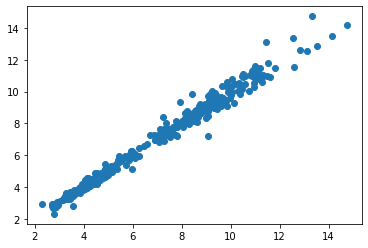

In [65]:
plt.scatter(df['StockAdjClose'],df['prediction'])

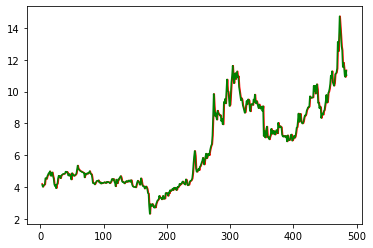

In [66]:
plt.plot(df['StockAdjClose'],color='red')
plt.plot(df['prediction'],color='green')

Read more on dataframe.drop
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [67]:
X = np.array(df.drop(['prediction'],1))

In [68]:
X

array([[4.12000e+00, 4.33000e+00, 4.07000e+00, ..., 3.99160e+04,
        1.00960e+05, 4.50200e+04],
       [4.18000e+00, 4.21000e+00, 4.02000e+00, ..., 4.17980e+04,
        3.99160e+04, 1.00960e+05],
       [4.12000e+00, 4.12000e+00, 3.96000e+00, ..., 3.59900e+04,
        4.17980e+04, 3.99160e+04],
       ...,
       [1.16500e+01, 1.22300e+01, 1.08000e+01, ..., 2.90397e+05,
        1.84416e+05, 3.69143e+05],
       [1.08800e+01, 1.15370e+01, 1.06900e+01, ..., 3.03848e+05,
        2.90397e+05, 1.84416e+05],
       [1.11000e+01, 1.16800e+01, 1.11000e+01, ..., 2.35103e+05,
        3.03848e+05, 2.90397e+05]])

In [69]:
print(type(X))

<class 'numpy.ndarray'>


In [70]:
len(X)

482

In [71]:
df.describe()

,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol,StockVol_DayMinus1,StockVol_DayMinus2,StockVol_DayMinus3,prediction
count,482.000000,482.000000,482.000000,482.000000,482.000000,4.820000e+02,4.820000e+02,4.820000e+02,4.820000e+02,482.000000
mean,6.452759,6.667608,6.242583,6.463423,6.463423,1.212824e+05,1.207419e+05,1.204636e+05,1.199266e+05,6.477573
std,2.581774,2.688695,2.479495,2.587587,2.587587,1.783069e+05,1.781575e+05,1.780832e+05,1.779192e+05,2.593824
min,2.550000,2.750000,2.130000,2.310000,2.310000,5.535000e+03,5.535000e+03,5.535000e+03,5.535000e+03,2.310000
25%,4.300000,4.400000,4.202500,4.300000,4.300000,3.830250e+04,3.830250e+04,3.830250e+04,3.830250e+04,4.302500
50%,5.060000,5.374000,4.930000,5.110000,5.110000,7.830600e+04,7.775000e+04,7.775000e+04,7.716750e+04,5.120000
75%,8.695000,8.977500,8.397500,8.770000,8.770000,1.446460e+05,1.435388e+05,1.430628e+05,1.429902e+05,8.792500
max,14.810000,15.320000,13.490000,14.730000,14.730000,2.332409e+06,2.332409e+06,2.332409e+06,2.332409e+06,14.730000


In [72]:
Y = np.array(df['prediction'])

In [73]:
Y

array([ 4.13 ,  4.01 ,  4.1  ,  4.13 ,  4.16 ,  4.55 ,  4.56 ,  4.51 ,
        4.68 ,  4.76 ,  4.86 ,  4.85 ,  4.99 ,  4.73 ,  4.7  ,  4.9  ,
        4.92 ,  4.68 ,  4.54 ,  4.18 ,  4.06 ,  4.14 ,  3.92 ,  4.17 ,
        4.2  ,  4.54 ,  4.71 ,  4.6  ,  4.69 ,  4.55 ,  4.71 ,  4.76 ,
        4.79 ,  4.82 ,  4.83 ,  4.82 ,  4.86 ,  4.97 ,  4.92 ,  4.96 ,
        4.91 ,  4.73 ,  4.72 ,  4.82 ,  4.69 ,  4.67 ,  4.47 ,  4.87 ,
        4.77 ,  4.78 ,  4.7  ,  4.71 ,  4.75 ,  4.78 ,  4.86 ,  5.11 ,
        5.35 ,  5.13 ,  5.11 ,  5.05 ,  5.01 ,  4.98 ,  4.98 ,  4.93 ,
        4.93 ,  4.9  ,  4.89 ,  4.6  ,  4.83 ,  4.78 ,  4.84 ,  4.86 ,
        4.83 ,  4.9  ,  4.9  ,  5.   ,  4.87 ,  4.81 ,  4.8  ,  4.56 ,
        4.25 ,  4.23 ,  4.24 ,  4.16 ,  4.24 ,  4.31 ,  4.38 ,  4.39 ,
        4.4  ,  4.42 ,  4.29 ,  4.27 ,  4.3  ,  4.21 ,  4.26 ,  4.23 ,
        4.26 ,  4.26 ,  4.3  ,  4.3  ,  4.25 ,  4.25 ,  4.33 ,  4.29 ,
        4.32 ,  4.31 ,  4.27 ,  4.23 ,  4.29 ,  4.35 ,  4.5  ,  4.51 ,
      

In [74]:
len(Y)

482

In [75]:
trainX,testX,trainY,testY = model_selection.train_test_split(X,Y,test_size=0.2,random_state=0)

<h2>As part our Supervised Machine Leaning exercise, for training purpose we are using 80% of the records from our dataframe. </h2> 

In [76]:
len(trainX)

385

In [77]:
len(testX)

97

In [78]:
len(trainY)

385

<h2>Let's build a Statistical Model using SciKit</h2>

In [79]:
stockPricePredictModel = DecisionTreeRegressor() 
#stockPricePredictModel = LinearRegression() 

# Using fit method we are passing all the 388 records stored in both trainX and trainY variables.
# This is the training step in the model building process.

stockPricePredictModel.fit(trainX, trainY)

# With our model trained with 80% of data from the dataframe
# we want to test and see how model scores on the remaining 20% of the data
# Remember in real-world you may be dealing with Terabyte or Petabyte of data

# Score method: Passing both testX and testY variables (they both have 20% of the data)
# RSquared value is always between 0 and 1 and 1 being high accurancy of prediction
# I'm multiplying this factor with 100 to represent the value in terms of percentage 
rSquaredFactore = (stockPricePredictModel.score(testX,testY)) * 100

#prediction = (clf.predict(X_prediction))

In [80]:
print(rSquaredFactore)

97.56132966190788


<h2>Let's see how our model predicts values for all the values in testX variable. Remeber testX has 20% of the data

Notice that I'm using predict method from the model. 
Tip: fit() to train, score() to get the R Squared Value and predict() to predict values  

In [81]:
allTestPrediction = stockPricePredictModel.predict(testX)

<h2>Let's compare and see how our model performed on predictions

In [82]:
# Creating a temp DataFrame
dfTemp = pd.DataFrame({'Actual Value in Test (20% of the data)':testY, 'Model Predicted as ':allTestPrediction})

In [83]:
dfTemp

,Actual Value in Test (20% of the data),Model Predicted as
0,4.90,4.55
1,4.69,4.76
2,4.42,4.40
3,6.07,6.26
4,2.31,3.05
...,...,...
92,8.81,8.77
93,4.23,4.27
94,11.13,11.20
95,3.31,3.45


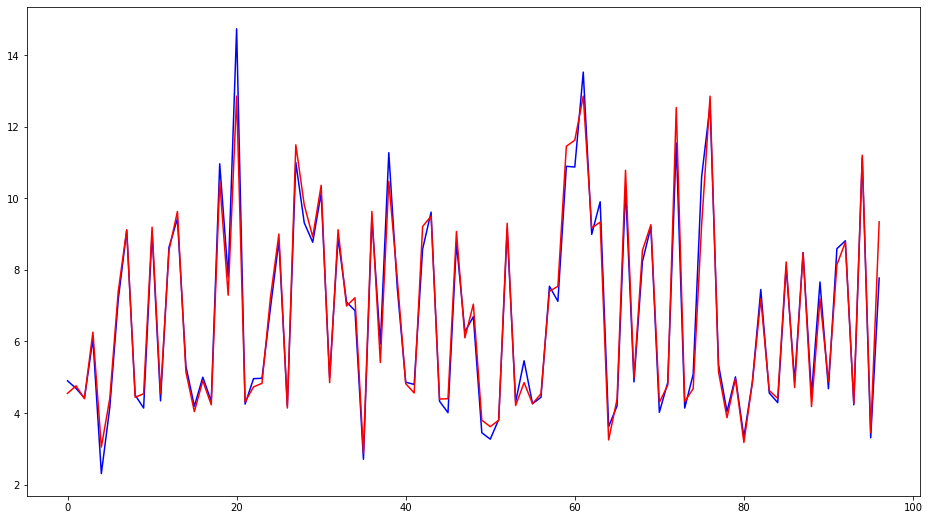

In [84]:
plt.figure(figsize=(16,9))
plt.plot(testY,color="blue")
plt.plot(allTestPrediction,color="red")

In [93]:
#sql = "SELECT TOP 1 * FROM dbo.Stock where StockSym = 'XBIT' AND StockDt < '2019-12-06' ORDER BY StockDt DESC"

sql =  "SELECT TOP 1 StockSym,StockDt,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol, \
       LAG(StockVol,1,NULL) over (order by StockDt) StockVol_DayMinus1, \
       LAG(StockVol,2,NULL) over (order by StockDt) StockVol_DayMinus2, \
       LAG(StockVol,3,NULL) over (order by StockDt) StockVol_DayMinus3 \
       FROM dbo.Stock where StockSym = 'XBIT' AND StockDt < '2019-12-06' \
       ORDER BY StockDt DESC"

dfLastRecordedTrade = pd.read_sql(sql,conn)

SyntaxError: EOL while scanning string literal (<ipython-input-93-90a1c2503198>, line 3)

In [86]:
dfLastRecordedTrade.head()

,StockSym,StockDt,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol
0,XBIT,2019-12-05,11.44,11.68,10.81,11.02,11.02,235989


In [87]:
dfLastRecordedTrade = dfLastRecordedTrade.drop(['StockSym'],axis=1)
dfLastRecordedTrade = dfLastRecordedTrade.drop(['StockDt'],axis=1)

In [88]:
dfLastRecordedTrade.head()

,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol
0,11.44,11.68,10.81,11.02,11.02,235989


In [89]:
inputX = np.array(dfLastRecordedTrade)

In [90]:
inputX

array([[1.14400e+01, 1.16800e+01, 1.08100e+01, 1.10200e+01, 1.10200e+01,
        2.35989e+05]])

In [91]:
futureStockPrice = stockPricePredictModel.predict(inputX)

ValueError: Number of features of the model must match the input. Model n_features is 9 and input n_features is 6 

In [49]:
print(futureStockPrice)

[11.45]
